<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import,-setups" data-toc-modified-id="Import,-setups-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import, setups</a></span></li><li><span><a href="#Read-data" data-toc-modified-id="Read-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read data</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Impact-of-the-day" data-toc-modified-id="Impact-of-the-day-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Impact of the day</a></span></li><li><span><a href="#Items-categories" data-toc-modified-id="Items-categories-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Items categories</a></span></li><li><span><a href="#For-how-long-itmes-have-been-sold" data-toc-modified-id="For-how-long-itmes-have-been-sold-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>For how long itmes have been sold</a></span></li><li><span><a href="#Shops-analysis" data-toc-modified-id="Shops-analysis-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Shops analysis</a></span></li><li><span><a href="#Did-shops-differ-in-offer?" data-toc-modified-id="Did-shops-differ-in-offer?-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Did shops differ in offer?</a></span></li></ul></li></ul></div>

# Import, setups

In [1]:
%load_ext autoreload
%autoreload 2

In [97]:
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import plotly.graph_objects as go
from tqdm.notebook import tqdm
import seaborn as sns

from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.multitest import multipletests
import scipy

# Read data

In [3]:
DATA_PREFIX = '../data/'

In [4]:
item_categories = pd.read_csv(DATA_PREFIX + 'item_categories.csv')
items = pd.read_csv(DATA_PREFIX + 'items.csv')
sales_train = pd.read_csv(DATA_PREFIX + 'sales_train.csv')
shops = pd.read_csv(DATA_PREFIX + 'shops.csv')
test = pd.read_csv(DATA_PREFIX + 'test.csv')

In [5]:
shops.head()

shop_name  shop_id
0   !Якутск Орджоникидзе, 56 фран        0
1   !Якутск ТЦ "Центральный" фран        1
2                Адыгея ТЦ "Мега"        2
3  Балашиха ТРК "Октябрь-Киномир"        3
4        Волжский ТЦ "Волга Молл"        4

In [6]:
print(len(item_categories))
item_categories.head()

84


item_category_name  item_category_id
0  PC - Гарнитуры/Наушники                 0
1         Аксессуары - PS2                 1
2         Аксессуары - PS3                 2
3         Аксессуары - PS4                 3
4         Аксессуары - PSP                 4

In [7]:
print(len(items))
items.head()

22170


item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4        ***КОРОБКА (СТЕКЛО)                       D        4   

   item_category_id  
0                40  
1                76  
2                40  
3                40  
4                40

In [8]:
# Merge cateogory of item to each of the items
# items = items.merge(item_categories, on='item_category_id')
items.head()

item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4        ***КОРОБКА (СТЕКЛО)                       D        4   

   item_category_id  
0                40  
1                76  
2                40  
3                40  
4                40

In [9]:
sales_train.head()

date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0

In [10]:
sales_train = sales_train.merge(items.loc[:, ['item_id', 'item_category_id']], on='item_id')

In [11]:
sales_train.describe()

date_block_num       shop_id       item_id    item_price  item_cnt_day  \
count    2.935849e+06  2.935849e+06  2.935849e+06  2.935849e+06  2.935849e+06   
mean     1.456991e+01  3.300173e+01  1.019723e+04  8.908532e+02  1.242641e+00   
std      9.422988e+00  1.622697e+01  6.324297e+03  1.729800e+03  2.618834e+00   
min      0.000000e+00  0.000000e+00  0.000000e+00 -1.000000e+00 -2.200000e+01   
25%      7.000000e+00  2.200000e+01  4.476000e+03  2.490000e+02  1.000000e+00   
50%      1.400000e+01  3.100000e+01  9.343000e+03  3.990000e+02  1.000000e+00   
75%      2.300000e+01  4.700000e+01  1.568400e+04  9.990000e+02  1.000000e+00   
max      3.300000e+01  5.900000e+01  2.216900e+04  3.079800e+05  2.169000e+03   

       item_category_id  
count      2.935849e+06  
mean       4.000138e+01  
std        1.710076e+01  
min        0.000000e+00  
25%        2.800000e+01  
50%        4.000000e+01  
75%        5.500000e+01  
max        8.300000e+01

In [12]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 7 columns):
 #   Column            Dtype  
---  ------            -----  
 0   date              object 
 1   date_block_num    int64  
 2   shop_id           int64  
 3   item_id           int64  
 4   item_price        float64
 5   item_cnt_day      float64
 6   item_category_id  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 179.2+ MB


In [13]:
sales_train.loc[:, 'date'] = pd.to_datetime(sales_train.date)

In [14]:
sales_train = sales_train.sort_values(
    ['date', 'shop_id', 'item_category_id', 'item_id']
).reset_index(drop=True)

In [15]:
sales_train.loc[:, 'day'] = sales_train.date.dt.day
sales_train.loc[:, 'month'] = sales_train.date.dt.month
sales_train.loc[:, 'year'] = sales_train.date.dt.year
sales_train.loc[:, 'dayofweek'] = sales_train.date.dt.dayofweek

In [16]:
sales_train.loc[:, 'income'] = sales_train.item_price * sales_train.item_cnt_day

# EDA

In [17]:
sales_train.head()

date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0 2013-01-01               0        2     5649      2190.0           1.0   
1 2013-01-01               0        2    13434     13489.5           1.0   
2 2013-01-01               0        2     3320      1999.0           1.0   
3 2013-01-01               0        2     4464       599.0           1.0   
4 2013-01-01               0        2     6916       999.5           1.0   

   item_category_id  day  month  year  dayofweek   income  
0                 2    1      1  2013          1   2190.0  
1                11    1      1  2013          1  13489.5  
2                19    1      1  2013          1   1999.0  
3                19    1      1  2013          1    599.0  
4                19    1      1  2013          1    999.5

In [ ]:
px.histogram(sales_train.date)

In [19]:
px.line(
    sales_train.groupby('date_block_num')['item_id'].count().reset_index(), 
    x='date_block_num', y='item_id')

In [20]:
months = ['', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 
          'August', 'September', 'October', 'November', 'December']
day_sales = sales_train.groupby(['year', 'month'])['income'].sum().reset_index()
day_sales.loc[:, 'month'] = day_sales.month.apply(lambda x: months[x])
day_sales = day_sales.reset_index()
fig = px.scatter_polar(
    day_sales, r='income', theta='month', color='index', 
    color_continuous_scale='viridis')
fig.update_layout(
    coloraxis_colorbar=dict(
        title="months<br>since<br>beginning",
    ),
)

## Impact of the day

In [21]:
per_day_sales = sales_train.groupby(['dayofweek', 'date'])['income'].sum().reset_index()

In [22]:
px.box(
    per_day_sales, 
    x='dayofweek', y='income', points='outliers')\
.update_layout(
    yaxis_range=[0, per_day_sales.income.quantile(0.99)]
)

In [23]:
results = []
for day1 in range(7):
    for day2 in range(day1 + 1, 7):
        _, p = scipy.stats.ranksums(
            x=per_day_sales.loc[per_day_sales.dayofweek==day1, 'income'],
            y=per_day_sales.loc[per_day_sales.dayofweek==day2, 'income'],
        )
        results.append([(day1, day2), p])

In [24]:
# Benjamini/Hochberg correction for p values when performing many tests
_, p, _, _ = multipletests([i[1] for i in results], alpha=0.05, method='fdr_bh', returnsorted=False)
for i in range(len(results)):
    results[i][1] = p[i]
    
for days, p in results:
    if p < 0.05:
        print(days)

(0, 4)
(0, 5)
(0, 6)
(1, 4)
(1, 5)
(1, 6)
(2, 4)
(2, 5)
(2, 6)
(3, 4)
(3, 5)
(3, 6)
(4, 5)
(5, 6)


From this test and from above histogram we see that from Monday to Thursay sales are the lowest (and also we can't say which day makes more income - those differences are statistically not significant). Every day from Friday to Sunday produces significantly more income that other working days. In particular Saturday outperforms every other day including Friday and Sunday. There is no siginificant difference between Friday and Sunday.

## Items categories

In [25]:
print(f'Number of unique items {len(items)}\nNumber of categories {len(items.item_category_id.unique())}')

Number of unique items 22170
Number of categories 84


In [26]:
px.histogram(items.groupby('item_category_id')['item_id'].count(), nbins=1000)\
.update_layout(xaxis_title='group size', yaxis_title='number of groups')

In [27]:
tmp = sales_train.groupby(['item_category_id', 'item_id'])['item_price'].mean().reset_index()
order = tmp.groupby('item_category_id').mean().reset_index().sort_values('item_price').item_category_id.tolist()
px.box(
    tmp,
    x='item_category_id', y='item_price', log_y=True, category_orders={'item_category_id': order}
)\
.update_layout(
    xaxis_type='category',
    width=1500
)

Categories differs in price to each other

In [28]:
item_categories.loc[12] 

# indeed, the most expensive category is PS4 :)

item_category_name    Игровые консоли - PS4
item_category_id                         12
Name: 12, dtype: object

In [29]:
item_categories.loc[71]

# Gifts - Bags, Albums, Mouse Pads are the cheapest

item_category_name    Подарки - Сумки, Альбомы, Коврики д/мыши
item_category_id                                            71
Name: 71, dtype: object

## For how long itmes have been sold 

In [30]:
sales_train

date  date_block_num  shop_id  item_id  item_price  \
0       2013-01-01               0        2     5649      2190.0   
1       2013-01-01               0        2    13434     13489.5   
2       2013-01-01               0        2     3320      1999.0   
3       2013-01-01               0        2     4464       599.0   
4       2013-01-01               0        2     6916       999.5   
...            ...             ...      ...      ...         ...   
2935844 2015-12-10              33       59    18441       299.0   
2935845 2015-12-10              33       59    19289       999.0   
2935846 2015-12-10              33       59    15854       859.0   
2935847 2015-12-10              33       59    20949         5.0   
2935848 2015-12-10              33       59    17717       500.0   

         item_cnt_day  item_category_id  day  month  year  dayofweek   income  
0                 1.0                 2    1      1  2013          1   2190.0  
1                 1.0                11    1      1  2013          1  13489.5  
2                 1.0                19    1      1  2013          1   1999.0  
3                 1.0                19    1      1  2013          1    599.0  
4                 1.0                19    1      1  2013          1    999.5  
...               ...               ...  ...    ...   ...        ...      ...  
2935844           1.0                55   10     12  2015          3    299.0  
2935845           1.0                67   10     12  2015          3    999.0  
2935846           1.0                70   10     12  2015          3    859.0  
2935847           2.0                71   10     12  2015          3     10.0  
2935848           1.0                79   10     12  2015          3    500.0  

[2935849 rows x 12 columns]

In [33]:
tmp = pd.pivot_table(sales_train, index='item_id', values='date', aggfunc=['min', 'max'])

tmp.loc[:, 'min_date'] = tmp.loc[:, 'min'].date
tmp.loc[:, 'max_date'] = tmp.loc[:, 'max'].date
tmp = tmp.drop(['min', 'max'], axis=1)

tmp.loc[:, 'item_last'] = (tmp.loc[:, 'max_date'] - tmp.loc[:, 'min_date']).dt.days

tmp = tmp.sort_values(['min_date', 'item_last'], axis=0)

In [ ]:
px.histogram(tmp.item_last)\
.update_layout(
    title='Histogram of time of products being sold',
    xaxis_title='Number of days the product have been sold',
    yaxis_title='# of products'
)

In [73]:
fig = go.Figure()
for i, (item, data) in enumerate(tmp.iterrows()):
    data = data.values[:2]
    fig.add_trace(
        go.Scattergl(
            x=data, y=[i, i], 
            mode='lines', 
            line=dict(color='red'),
            showlegend=False,
        )
   )
fig.show('browser')

del fig

In [82]:
px.histogram(x=tmp.min_date).show()
px.histogram(x=tmp.max_date).show()
px.histogram(x=tmp.min_date.dt.month).show()
px.histogram(x=tmp.max_date.dt.month).show()
px.histogram(x=tmp.min_date.dt.day).show()
px.histogram(x=tmp.max_date.dt.day).show()

As seen from those plots - most of items are introducted within two weeks after New Year. They are recalled the most offen within first two weeks of December.

## Shops analysis

In [85]:
len(sales_train.shop_id.unique())

60

In [91]:
tmp = pd.pivot_table(sales_train, index='shop_id', values='date', aggfunc=['min', 'max'])
tmp.loc[:, 'min_date'] = tmp.loc[:, 'min'].date
tmp.loc[:, 'max_date'] = tmp.loc[:, 'max'].date
tmp = tmp.drop(['min', 'max'], axis=1)
tmp.loc[:, 'shop_last'] = (tmp.loc[:, 'max_date'] - tmp.loc[:, 'min_date']).dt.days
tmp = tmp.sort_values(['min_date', 'shop_last'], axis=0)

In [92]:
fig = go.Figure()
for i, (item, data) in enumerate(tmp.iterrows()):
    data = data.values[:2]
    fig.add_trace(
        go.Scattergl(
            x=data, y=[i, i], 
            mode='lines', 
            line=dict(color='red'),
            showlegend=False,
        )
   )
fig.show()
del fig

On average ~50 shops were constantly active. If show happend to be closed/open it was usually near New Year.

## Did shops differ in offer?

1.0

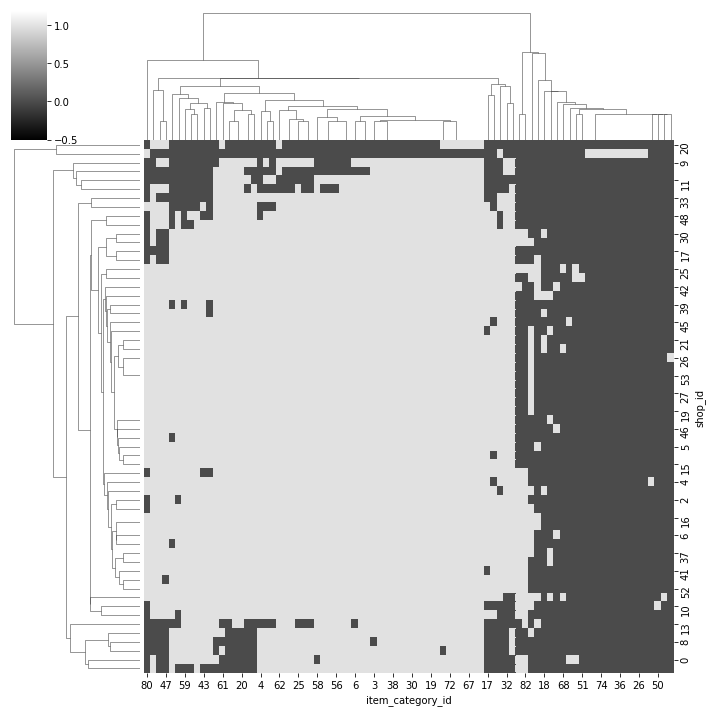

In [136]:
shop_specification = pd.pivot_table(
    sales_train, index='shop_id', columns='item_category_id', values='income', aggfunc='sum'
)
sns.clustermap(shop_specification.fillna(False).astype(bool), cmap='gray', vmin=-0.5, vmax=1.2)

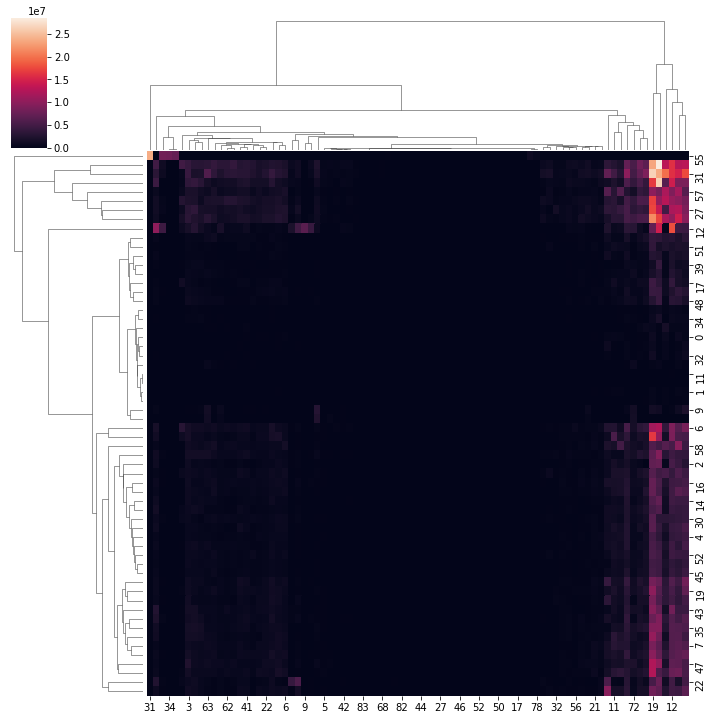

In [137]:
sns.clustermap(np.nan_to_num(shop_specification, 0))

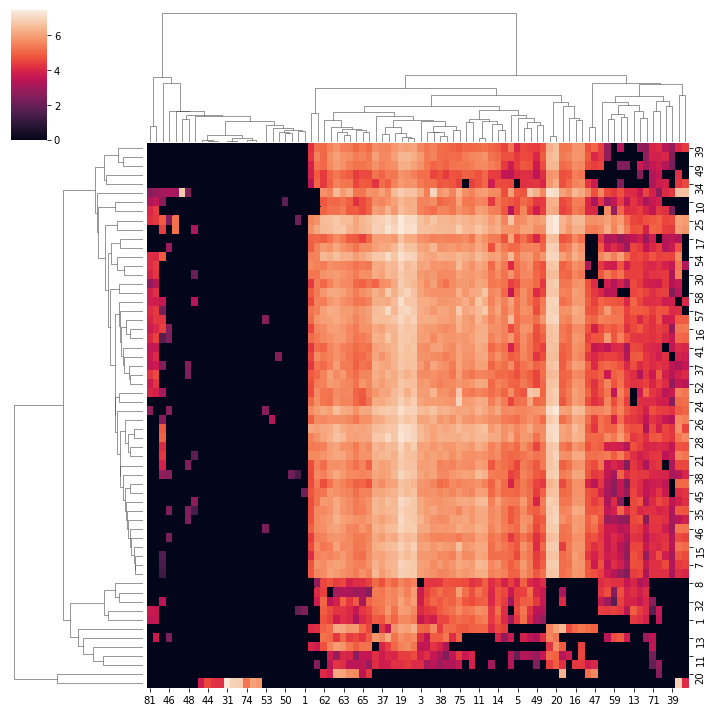

In [138]:
sns.clustermap(np.log10(np.maximum(np.nan_to_num(shop_specification, 0), 1)))

There are 3 clusters of shops. One comprises most of the shops, they have big or huge earnings and sell similar kind of products. Within it we can distinguish approx. 6 shops that have enormous income.

The second cluster have smaller earnings and in general shops within in have smaller diversity of products.

Thist cluster is created by 2 shops which have very limited assortment. One of them sells products of completely different type than the others.